In [51]:
# import libraries
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import sklearn.model_selection as skm

In [52]:
Original_data = pd.read_csv(r'D:\william\OneDrive - UW-Madison\UW-Madison\722\-2025AAE722_William-J\Final Project\DataCoSupplyChainDataset1.csv')
data = Original_data.copy()
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [53]:
filtered_data = data[['Type','Benefit per order','Delivery Status','Late_delivery_risk','Category Name','Customer Country','Department Name','Market','order date (DateOrders)','Order Item Discount Rate','Order Item Product Price','Order Item Total','Order Status','Shipping Mode']]
filtered_data.head()

,Type,Benefit per order,Delivery Status,Late_delivery_risk,Category Name,Customer Country,Department Name,Market,order date (DateOrders),Order Item Discount Rate,Order Item Product Price,Order Item Total,Order Status,Shipping Mode
0,DEBIT,91.250000,Advance shipping,0,Sporting Goods,Puerto Rico,Fitness,Pacific Asia,1/31/2018 22:56,0.04,327.75,314.640015,COMPLETE,Standard Class
1,TRANSFER,-249.089996,Late delivery,1,Sporting Goods,Puerto Rico,Fitness,Pacific Asia,1/13/2018 12:27,0.05,327.75,311.359985,PENDING,Standard Class
2,CASH,-247.779999,Shipping on time,0,Sporting Goods,EE. UU.,Fitness,Pacific Asia,1/13/2018 12:06,0.06,327.75,309.720001,CLOSED,Standard Class
3,DEBIT,22.860001,Advance shipping,0,Sporting Goods,EE. UU.,Fitness,Pacific Asia,1/13/2018 11:45,0.07,327.75,304.809998,COMPLETE,Standard Class
4,PAYMENT,134.210007,Advance shipping,0,Sporting Goods,Puerto Rico,Fitness,Pacific Asia,1/13/2018 11:24,0.09,327.75,298.250000,PENDING_PAYMENT,Standard Class


In [54]:
# Create a new binary column 'Profitability' based on 'Benefit per order'
filtered_data['Profitability'] = np.where(filtered_data['Benefit per order'] > 0, 1, 0)

C:\Users\User\AppData\Local\Temp\ipykernel_11064\2654749869.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Profitability'] = np.where(filtered_data['Benefit per order'] > 0, 1, 0)


In [55]:
# Create dummy variables for 'Type' category
# Fill missing 'Type' values so they become their own category
filtered_data['Type'] = filtered_data['Type'].fillna('Missing')
# Create one-hot / dummy columns (prefix 'Type')
type_dummies = pd.get_dummies(filtered_data['Type'], prefix='Type')
# Append the dummy columns to the dataframe
filtered_data = pd.concat([filtered_data, type_dummies], axis=1)
# Show the first rows to verify new columns
filtered_data.head()

C:\Users\User\AppData\Local\Temp\ipykernel_11064\3513832.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Type'] = filtered_data['Type'].fillna('Missing')


,Type,Benefit per order,Delivery Status,Late_delivery_risk,Category Name,Customer Country,Department Name,Market,order date (DateOrders),Order Item Discount Rate,Order Item Product Price,Order Item Total,Order Status,Shipping Mode,Profitability,Type_CASH,Type_DEBIT,Type_PAYMENT,Type_TRANSFER
0,DEBIT,91.250000,Advance shipping,0,Sporting Goods,Puerto Rico,Fitness,Pacific Asia,1/31/2018 22:56,0.04,327.75,314.640015,COMPLETE,Standard Class,1,False,True,False,False
1,TRANSFER,-249.089996,Late delivery,1,Sporting Goods,Puerto Rico,Fitness,Pacific Asia,1/13/2018 12:27,0.05,327.75,311.359985,PENDING,Standard Class,0,False,False,False,True
2,CASH,-247.779999,Shipping on time,0,Sporting Goods,EE. UU.,Fitness,Pacific Asia,1/13/2018 12:06,0.06,327.75,309.720001,CLOSED,Standard Class,0,True,False,False,False
3,DEBIT,22.860001,Advance shipping,0,Sporting Goods,EE. UU.,Fitness,Pacific Asia,1/13/2018 11:45,0.07,327.75,304.809998,COMPLETE,Standard Class,1,False,True,False,False
4,PAYMENT,134.210007,Advance shipping,0,Sporting Goods,Puerto Rico,Fitness,Pacific Asia,1/13/2018 11:24,0.09,327.75,298.250000,PENDING_PAYMENT,Standard Class,1,False,False,True,False


In [56]:
# Create dummy variables for 'Category Name' category
filtered_data['Category Name'] = filtered_data['Category Name'].fillna('Missing')
category_dummies = pd.get_dummies(filtered_data['Category Name'], prefix='Category Name')
filtered_data = pd.concat([filtered_data, category_dummies], axis=1)
filtered_data.head()

,Type,Benefit per order,Delivery Status,Late_delivery_risk,Category Name,Customer Country,Department Name,Market,order date (DateOrders),Order Item Discount Rate,...,Category Name_Sporting Goods,Category Name_Strength Training,Category Name_Tennis & Racquet,Category Name_Toys,Category Name_Trade-In,Category Name_Video Games,Category Name_Water Sports,Category Name_Women's Apparel,Category Name_Women's Clothing,Category Name_Women's Golf Clubs
0,DEBIT,91.250000,Advance shipping,0,Sporting Goods,Puerto Rico,Fitness,Pacific Asia,1/31/2018 22:56,0.04,...,True,False,False,False,False,False,False,False,False,False
1,TRANSFER,-249.089996,Late delivery,1,Sporting Goods,Puerto Rico,Fitness,Pacific Asia,1/13/2018 12:27,0.05,...,True,False,False,False,False,False,False,False,False,False
2,CASH,-247.779999,Shipping on time,0,Sporting Goods,EE. UU.,Fitness,Pacific Asia,1/13/2018 12:06,0.06,...,True,False,False,False,False,False,False,False,False,False
3,DEBIT,22.860001,Advance shipping,0,Sporting Goods,EE. UU.,Fitness,Pacific Asia,1/13/2018 11:45,0.07,...,True,False,False,False,False,False,False,False,False,False
4,PAYMENT,134.210007,Advance shipping,0,Sporting Goods,Puerto Rico,Fitness,Pacific Asia,1/13/2018 11:24,0.09,...,True,False,False,False,False,False,False,False,False,False


In [57]:
filtered_data['Department Name'] = filtered_data['Department Name'].fillna('Missing')
department_dummies = pd.get_dummies(filtered_data['Department Name'], prefix='Department Name')
filtered_data = pd.concat([filtered_data, department_dummies], axis=1)
filtered_data.head()

,Type,Benefit per order,Delivery Status,Late_delivery_risk,Category Name,Customer Country,Department Name,Market,order date (DateOrders),Order Item Discount Rate,...,Department Name_Book Shop,Department Name_Discs Shop,Department Name_Fan Shop,Department Name_Fitness,Department Name_Footwear,Department Name_Golf,Department Name_Health and Beauty,Department Name_Outdoors,Department Name_Pet Shop,Department Name_Technology
0,DEBIT,91.250000,Advance shipping,0,Sporting Goods,Puerto Rico,Fitness,Pacific Asia,1/31/2018 22:56,0.04,...,False,False,False,True,False,False,False,False,False,False
1,TRANSFER,-249.089996,Late delivery,1,Sporting Goods,Puerto Rico,Fitness,Pacific Asia,1/13/2018 12:27,0.05,...,False,False,False,True,False,False,False,False,False,False
2,CASH,-247.779999,Shipping on time,0,Sporting Goods,EE. UU.,Fitness,Pacific Asia,1/13/2018 12:06,0.06,...,False,False,False,True,False,False,False,False,False,False
3,DEBIT,22.860001,Advance shipping,0,Sporting Goods,EE. UU.,Fitness,Pacific Asia,1/13/2018 11:45,0.07,...,False,False,False,True,False,False,False,False,False,False
4,PAYMENT,134.210007,Advance shipping,0,Sporting Goods,Puerto Rico,Fitness,Pacific Asia,1/13/2018 11:24,0.09,...,False,False,False,True,False,False,False,False,False,False


In [58]:
filtered_data['Market'] = filtered_data['Market'].fillna('Missing')
market_dummies = pd.get_dummies(filtered_data['Market'], prefix='Market')
filtered_data = pd.concat([filtered_data, market_dummies], axis=1)
filtered_data.head()

,Type,Benefit per order,Delivery Status,Late_delivery_risk,Category Name,Customer Country,Department Name,Market,order date (DateOrders),Order Item Discount Rate,...,Department Name_Golf,Department Name_Health and Beauty,Department Name_Outdoors,Department Name_Pet Shop,Department Name_Technology,Market_Africa,Market_Europe,Market_LATAM,Market_Pacific Asia,Market_USCA
0,DEBIT,91.250000,Advance shipping,0,Sporting Goods,Puerto Rico,Fitness,Pacific Asia,1/31/2018 22:56,0.04,...,False,False,False,False,False,False,False,False,True,False
1,TRANSFER,-249.089996,Late delivery,1,Sporting Goods,Puerto Rico,Fitness,Pacific Asia,1/13/2018 12:27,0.05,...,False,False,False,False,False,False,False,False,True,False
2,CASH,-247.779999,Shipping on time,0,Sporting Goods,EE. UU.,Fitness,Pacific Asia,1/13/2018 12:06,0.06,...,False,False,False,False,False,False,False,False,True,False
3,DEBIT,22.860001,Advance shipping,0,Sporting Goods,EE. UU.,Fitness,Pacific Asia,1/13/2018 11:45,0.07,...,False,False,False,False,False,False,False,False,True,False
4,PAYMENT,134.210007,Advance shipping,0,Sporting Goods,Puerto Rico,Fitness,Pacific Asia,1/13/2018 11:24,0.09,...,False,False,False,False,False,False,False,False,True,False


In [59]:
filtered_data['Shipping Mode'] = filtered_data['Shipping Mode'].fillna('Missing')
shipping_mode_dummies = pd.get_dummies(filtered_data['Shipping Mode'], prefix='Shipping Mode')
filtered_data = pd.concat([filtered_data, shipping_mode_dummies], axis=1)
filtered_data.head()

,Type,Benefit per order,Delivery Status,Late_delivery_risk,Category Name,Customer Country,Department Name,Market,order date (DateOrders),Order Item Discount Rate,...,Department Name_Technology,Market_Africa,Market_Europe,Market_LATAM,Market_Pacific Asia,Market_USCA,Shipping Mode_First Class,Shipping Mode_Same Day,Shipping Mode_Second Class,Shipping Mode_Standard Class
0,DEBIT,91.250000,Advance shipping,0,Sporting Goods,Puerto Rico,Fitness,Pacific Asia,1/31/2018 22:56,0.04,...,False,False,False,False,True,False,False,False,False,True
1,TRANSFER,-249.089996,Late delivery,1,Sporting Goods,Puerto Rico,Fitness,Pacific Asia,1/13/2018 12:27,0.05,...,False,False,False,False,True,False,False,False,False,True
2,CASH,-247.779999,Shipping on time,0,Sporting Goods,EE. UU.,Fitness,Pacific Asia,1/13/2018 12:06,0.06,...,False,False,False,False,True,False,False,False,False,True
3,DEBIT,22.860001,Advance shipping,0,Sporting Goods,EE. UU.,Fitness,Pacific Asia,1/13/2018 11:45,0.07,...,False,False,False,False,True,False,False,False,False,True
4,PAYMENT,134.210007,Advance shipping,0,Sporting Goods,Puerto Rico,Fitness,Pacific Asia,1/13/2018 11:24,0.09,...,False,False,False,False,True,False,False,False,False,True


In [60]:
# Parse 'order date (DateOrders)' to datetime and extract month
# Coerce errors to NaT so bad values become missing
filtered_data['order date (DateOrders)'] = pd.to_datetime(filtered_data['order date (DateOrders)'], errors='coerce')
# Extract month number (1-12); NaT becomes NaN
filtered_data['Order_Month'] = filtered_data['order date (DateOrders)'].dt.month
# Map month numbers to short month names and mark missing as 'Missing'
month_map = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
filtered_data['Order_Month_Name'] = filtered_data['Order_Month'].map(month_map).fillna('Missing')
# Create one-hot dummy columns for month names (Month_Jan, Month_Feb, ... , Month_Missing)
month_dummies = pd.get_dummies(filtered_data['Order_Month_Name'], prefix='Month')
# Append month dummy columns to the dataframe
filtered_data = pd.concat([filtered_data, month_dummies], axis=1)
# Show the first rows to verify new month columns
filtered_data.head()

,Type,Benefit per order,Delivery Status,Late_delivery_risk,Category Name,Customer Country,Department Name,Market,order date (DateOrders),Order Item Discount Rate,...,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,DEBIT,91.250000,Advance shipping,0,Sporting Goods,Puerto Rico,Fitness,Pacific Asia,2018-01-31 22:56:00,0.04,...,False,False,True,False,False,False,False,False,False,False
1,TRANSFER,-249.089996,Late delivery,1,Sporting Goods,Puerto Rico,Fitness,Pacific Asia,2018-01-13 12:27:00,0.05,...,False,False,True,False,False,False,False,False,False,False
2,CASH,-247.779999,Shipping on time,0,Sporting Goods,EE. UU.,Fitness,Pacific Asia,2018-01-13 12:06:00,0.06,...,False,False,True,False,False,False,False,False,False,False
3,DEBIT,22.860001,Advance shipping,0,Sporting Goods,EE. UU.,Fitness,Pacific Asia,2018-01-13 11:45:00,0.07,...,False,False,True,False,False,False,False,False,False,False
4,PAYMENT,134.210007,Advance shipping,0,Sporting Goods,Puerto Rico,Fitness,Pacific Asia,2018-01-13 11:24:00,0.09,...,False,False,True,False,False,False,False,False,False,False


In [61]:
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text) #DTC for classification, DTR for regression, plot_tree to visualize tree, export_text to get rules
from sklearn.metrics import (accuracy_score,
                             log_loss) #accuracy_score for classification accuracy, log_loss for cross-entropy loss
from sklearn.ensemble import \
     (RandomForestRegressor as RF,
      GradientBoostingRegressor as GBR)
from ISLP.models import ModelSpec as MS
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [62]:
columns_to_exclude = ['Type','Order_Month_Name','Order_Month','Profitability','Delivery Status','Late_delivery_risk','Category Name','Customer Country','Department Name','Market','order date (DateOrders)','Order Item Total','Order Status','Shipping Mode']
existing_columns_to_exclude = [col for col in columns_to_exclude if col in filtered_data.columns]
D = filtered_data.columns.drop(existing_columns_to_exclude)

# Build X as the data matrix with rows = samples, cols = features
X = filtered_data.loc[:, D].to_numpy()    # <- was np.asarray(D) which produced column names
y = filtered_data['Late_delivery_risk'].to_numpy()

# Quick sanity check
print("X.shape =", X.shape)   # expect (180519, n_features)
print("y.shape =", y.shape)   # expect (180519,)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

X.shape = (180519, 89)
y.shape = (180519,)


In [63]:
# late delivery Bagging model

bag_late = RF(max_features=X_train.shape[1], random_state=42) 
bag_late.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,89
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [64]:
y_hat_bag = bag_late.predict(X_test) # Predict on test data
np.mean((y_test - y_hat_bag)**2)

np.float64(0.21378749421727114)

Benefit per order                0.318394
Shipping Mode_Standard Class     0.170237
Order Item Discount Rate         0.127814
Order Item Product Price         0.038371
Shipping Mode_Same Day           0.029708
Market_Europe                    0.012561
Market_Pacific Asia              0.012215
Type_DEBIT                       0.012116
Month_Jan                        0.012057
Type_PAYMENT                     0.011387
Market_LATAM                     0.010886
Market_USCA                      0.010847
Month_Aug                        0.010547
Month_May                        0.010460
Month_Mar                        0.010260
Month_Apr                        0.010239
Month_Feb                        0.010204
Month_Jun                        0.009911
Month_Jul                        0.009570
Month_Oct                        0.008849
Month_Nov                        0.008710
Type_CASH                        0.008351
Month_Dec                        0.008193
Shipping Mode_First Class        0

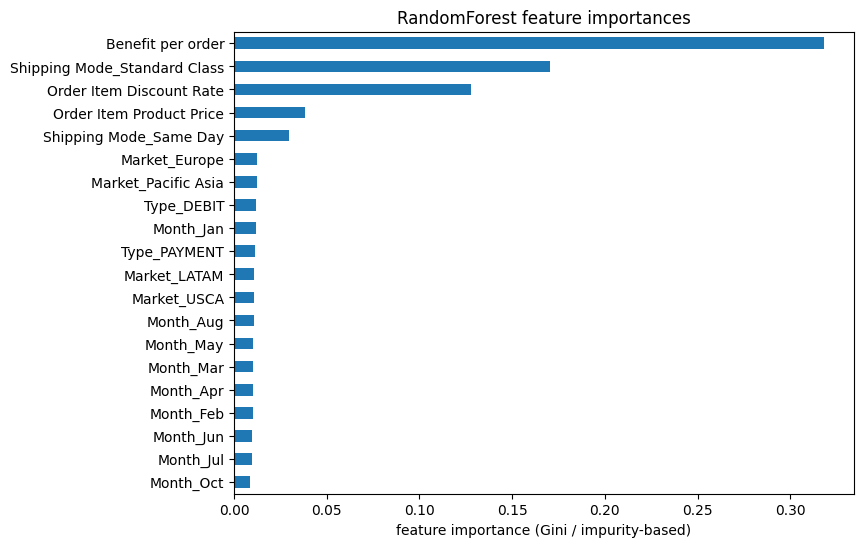

In [65]:
# feature names (D from your notebook is the Index of feature columns)
feature_names = list(D)

# scikit-learn RF/ensemble attribute
importances = bag_late.feature_importances_

# tidy dataframe and sort
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print(feat_imp.head(30))

# optional: plot top 20
import matplotlib.pyplot as plt
feat_imp.head(20).plot(kind='barh', figsize=(8,6))
plt.gca().invert_yaxis()
plt.xlabel('feature importance (Gini / impurity-based)')
plt.title('RandomForest feature importances')
plt.show()

In [67]:
# late delivery RF model

rf_late = RF(max_features=10,
               random_state=42).fit(X_train, y_train)  
y_hat_rf = rf_late.predict(X_test) # Predict on test data
np.mean((y_test - y_hat_rf)**2)

np.float64(0.23042836935183414)

Benefit per order               0.394885
Order Item Discount Rate        0.200672
Shipping Mode_Standard Class    0.098366
Shipping Mode_First Class       0.071645
Shipping Mode_Second Class      0.033632
Order Item Product Price        0.021772
Shipping Mode_Same Day          0.010501
Market_Europe                   0.007056
Market_Pacific Asia             0.006847
Month_Jan                       0.006644
Type_TRANSFER                   0.006166
Market_USCA                     0.005772
Month_Jun                       0.005712
Market_LATAM                    0.005210
Month_Feb                       0.005141
Month_May                       0.005116
Month_Nov                       0.005069
Month_Apr                       0.005041
Type_DEBIT                      0.005023
Month_Aug                       0.004961
Month_Mar                       0.004924
Month_Oct                       0.004859
Market_Africa                   0.004814
Month_Dec                       0.004732
Month_Jul       

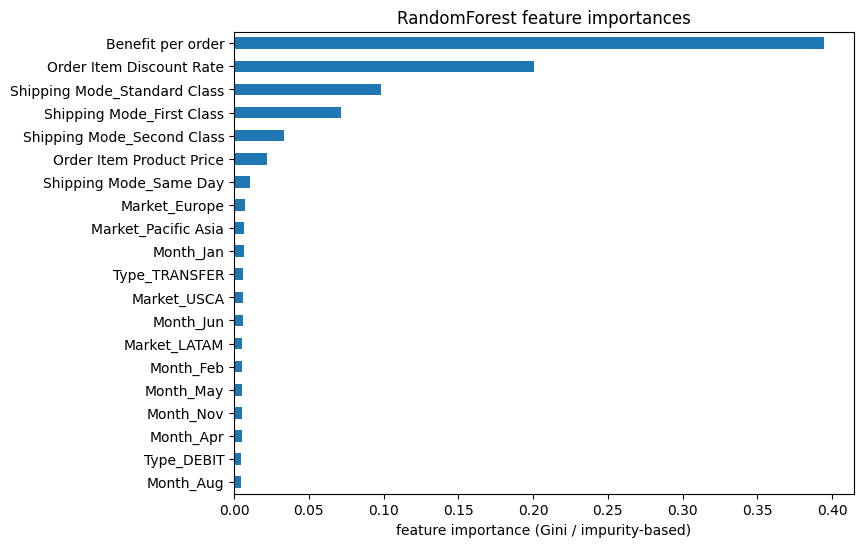

In [68]:
# feature names (D from your notebook is the Index of feature columns)
feature_names = list(D)

# scikit-learn RF/ensemble attribute
importances = rf_late.feature_importances_

# tidy dataframe and sort
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print(feat_imp.head(30))

# optional: plot top 20
import matplotlib.pyplot as plt
feat_imp.head(20).plot(kind='barh', figsize=(8,6))
plt.gca().invert_yaxis()
plt.xlabel('feature importance (Gini / impurity-based)')
plt.title('RandomForest feature importances')
plt.show()

## Hyperparameter Tuning for Gradient Boosting

There are several approaches to determine reasonable learning rate and max_depth:
1. **Learning Rate vs Performance Curve**: Test different learning rates and see training progression
2. **Grid Search**: Systematic search over parameter combinations
3. **Staged Prediction**: Monitor overfitting during training
4. **Validation Curves**: See how each parameter affects validation performance

Let's implement these approaches:

Testing different learning rates (with max_depth=3, n_estimators=100):
Learning Rate 0.01: CV MSE = 0.201642
Learning Rate 0.05: CV MSE = 0.193762
Learning Rate 0.1: CV MSE = 0.193840
Learning Rate 0.2: CV MSE = 0.194025
Learning Rate 0.3: CV MSE = 0.194320


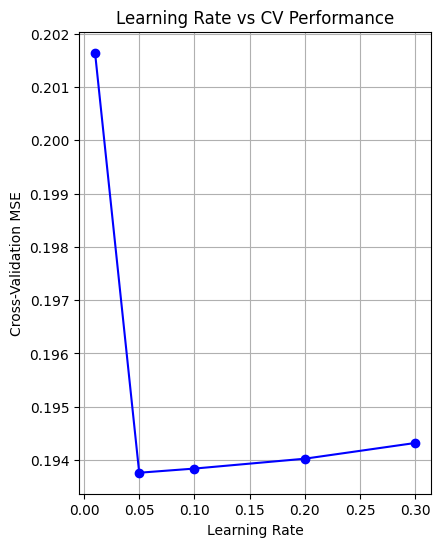

In [69]:
# Method 1: Test different learning rates with fixed parameters
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Test different learning rates
learning_rates = [0.01, 0.05, 0.1, 0.2, 0.3]
lr_scores = []

print("Testing different learning rates (with max_depth=3, n_estimators=100):")
for lr in learning_rates:
    # Use smaller n_estimators for quick testing
    gbr_temp = GBR(n_estimators=100, learning_rate=lr, max_depth=3, random_state=42)
    # Use cross-validation to get more reliable estimates
    cv_scores = cross_val_score(gbr_temp, X_train, y_train, cv=3, 
                               scoring='neg_mean_squared_error', n_jobs=-1)
    mean_score = -cv_scores.mean()  # Convert back to positive MSE
    lr_scores.append(mean_score)
    print(f"Learning Rate {lr}: CV MSE = {mean_score:.6f}")

# Plot results
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(learning_rates, lr_scores, 'bo-')
plt.xlabel('Learning Rate')
plt.ylabel('Cross-Validation MSE')
plt.title('Learning Rate vs CV Performance')
plt.grid(True)


Testing different max_depth values (with learning_rate=0.1, n_estimators=100):
Max Depth 2: CV MSE = 0.193853
Max Depth 3: CV MSE = 0.193840
Max Depth 4: CV MSE = 0.193928
Max Depth 5: CV MSE = 0.194075
Max Depth 6: CV MSE = 0.194399


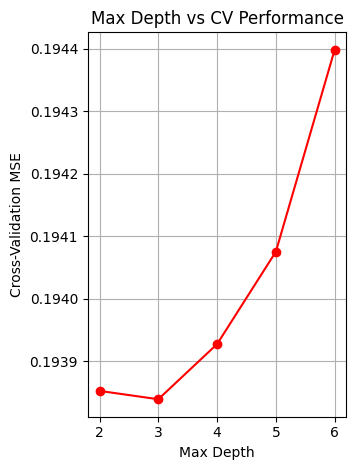


Initial best parameters:
Best learning rate: 0.05 (CV MSE: 0.193762)
Best max depth: 3 (CV MSE: 0.193840)


In [70]:
# Method 2: Test different max_depth values
max_depths = [2, 3, 4, 5, 6]
depth_scores = []

print("\nTesting different max_depth values (with learning_rate=0.1, n_estimators=100):")
for depth in max_depths:
    gbr_temp = GBR(n_estimators=100, learning_rate=0.1, max_depth=depth, random_state=42)
    cv_scores = cross_val_score(gbr_temp, X_train, y_train, cv=3, 
                               scoring='neg_mean_squared_error', n_jobs=-1)
    mean_score = -cv_scores.mean()
    depth_scores.append(mean_score)
    print(f"Max Depth {depth}: CV MSE = {mean_score:.6f}")

# Plot results
plt.subplot(1, 2, 2)
plt.plot(max_depths, depth_scores, 'ro-')
plt.xlabel('Max Depth')
plt.ylabel('Cross-Validation MSE')
plt.title('Max Depth vs CV Performance')
plt.grid(True)

plt.tight_layout()
plt.show()

# Find best parameters from these initial tests
best_lr = learning_rates[np.argmin(lr_scores)]
best_depth = max_depths[np.argmin(depth_scores)]
print(f"\nInitial best parameters:")
print(f"Best learning rate: {best_lr} (CV MSE: {min(lr_scores):.6f})")
print(f"Best max depth: {best_depth} (CV MSE: {min(depth_scores):.6f})")

In [71]:
# Method 3: Fine-grained Grid Search around promising values
from sklearn.model_selection import GridSearchCV

# Based on initial results, focus search around learning_rate=0.05 and max_depth=2-4
param_grid = {
    'learning_rate': [0.03, 0.05, 0.07, 0.1],
    'max_depth': [2, 3, 4],
    'n_estimators': [100, 200]  # Also test number of estimators
}

print("Performing grid search (this may take a few minutes)...")
grid_search = GridSearchCV(
    GBR(random_state=42),
    param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("\nGrid Search Results:")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV MSE: {-grid_search.best_score_:.6f}")

# Show top 5 parameter combinations
results_df = pd.DataFrame(grid_search.cv_results_)
top_results = results_df.nlargest(5, 'mean_test_score')[
    ['params', 'mean_test_score', 'std_test_score']
]
print("\nTop 5 parameter combinations:")
for i, (idx, row) in enumerate(top_results.iterrows()):
    print(f"{i+1}. {row['params']} - CV MSE: {-row['mean_test_score']:.6f} (±{row['std_test_score']:.6f})")

Performing grid search (this may take a few minutes)...
Fitting 3 folds for each of 24 candidates, totalling 72 fits

Grid Search Results:
Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Best CV MSE: 0.193762

Top 5 parameter combinations:
1. {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100} - CV MSE: 0.193762 (±0.000422)
2. {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100} - CV MSE: 0.193765 (±0.000391)
3. {'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 200} - CV MSE: 0.193783 (±0.000428)
4. {'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 200} - CV MSE: 0.193793 (±0.000397)
5. {'learning_rate': 0.07, 'max_depth': 3, 'n_estimators': 100} - CV MSE: 0.193806 (±0.000431)


Optimal number of estimators: 92
Validation MSE at optimal point: 0.194934


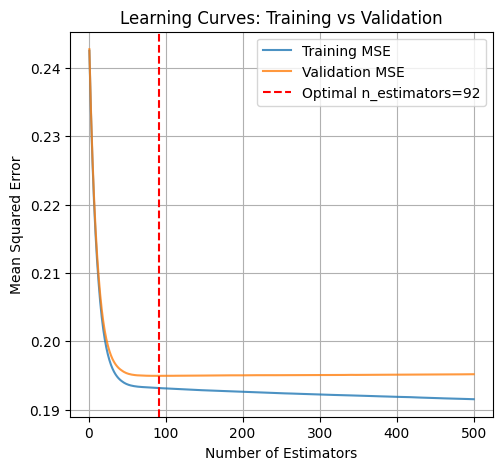

In [72]:
# Method 4: Learning Curves to check for overfitting
# Use the best parameters from grid search
best_params = grid_search.best_params_

# Create model with best parameters but more estimators to see learning progression
gbr_best = GBR(
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    n_estimators=500,  # Use more estimators to see the learning curve
    random_state=42
)

# Split training data into train/validation for learning curve
X_train_lc, X_val_lc, y_train_lc, y_val_lc = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# Fit the model
gbr_best.fit(X_train_lc, y_train_lc)

# Get staged predictions to see learning progression
train_scores = []
val_scores = []

for i, train_pred in enumerate(gbr_best.staged_predict(X_train_lc)):
    val_pred = list(gbr_best.staged_predict(X_val_lc))[i]
    
    train_mse = mean_squared_error(y_train_lc, train_pred)
    val_mse = mean_squared_error(y_val_lc, val_pred)
    
    train_scores.append(train_mse)
    val_scores.append(val_mse)

# Plot learning curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_scores) + 1), train_scores, label='Training MSE', alpha=0.8)
plt.plot(range(1, len(val_scores) + 1), val_scores, label='Validation MSE', alpha=0.8)
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curves: Training vs Validation')
plt.legend()
plt.grid(True)

# Find optimal number of estimators (where validation error stops decreasing)
optimal_n_estimators = np.argmin(val_scores) + 1
print(f"Optimal number of estimators: {optimal_n_estimators}")
print(f"Validation MSE at optimal point: {min(val_scores):.6f}")

plt.axvline(x=optimal_n_estimators, color='red', linestyle='--', 
            label=f'Optimal n_estimators={optimal_n_estimators}')
plt.legend()

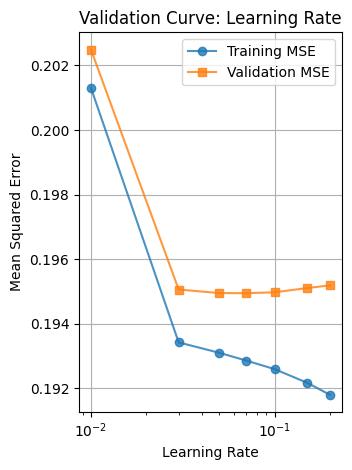


HYPERPARAMETER TUNING SUMMARY
Optimal Learning Rate: 0.05
Optimal Max Depth: 3
Optimal N Estimators: 92
Best CV MSE: 0.193762


In [73]:
# Validation curve for learning rate (more detailed analysis)
plt.subplot(1, 2, 2)
learning_rates_detailed = [0.01, 0.03, 0.05, 0.07, 0.1, 0.15, 0.2]
lr_train_scores = []
lr_val_scores = []

for lr in learning_rates_detailed:
    gbr_temp = GBR(learning_rate=lr, max_depth=best_params['max_depth'], 
                   n_estimators=100, random_state=42)
    gbr_temp.fit(X_train_lc, y_train_lc)
    
    train_pred = gbr_temp.predict(X_train_lc)
    val_pred = gbr_temp.predict(X_val_lc)
    
    lr_train_scores.append(mean_squared_error(y_train_lc, train_pred))
    lr_val_scores.append(mean_squared_error(y_val_lc, val_pred))

plt.plot(learning_rates_detailed, lr_train_scores, 'o-', label='Training MSE', alpha=0.8)
plt.plot(learning_rates_detailed, lr_val_scores, 's-', label='Validation MSE', alpha=0.8)
plt.xlabel('Learning Rate')
plt.ylabel('Mean Squared Error')
plt.title('Validation Curve: Learning Rate')
plt.legend()
plt.grid(True)
plt.xscale('log')

plt.tight_layout()
plt.show()

# Summary of optimal parameters
print("\n" + "="*50)
print("HYPERPARAMETER TUNING SUMMARY")
print("="*50)
print(f"Optimal Learning Rate: {best_params['learning_rate']}")
print(f"Optimal Max Depth: {best_params['max_depth']}")
print(f"Optimal N Estimators: {optimal_n_estimators}")
print(f"Best CV MSE: {-grid_search.best_score_:.6f}")
print("="*50)

In [74]:
# Build the final optimized model
final_boost_late = GBR(
    learning_rate=0.05,      # Optimal from grid search
    max_depth=3,             # Optimal from grid search  
    n_estimators=92,         # Optimal from learning curve
    random_state=42
)

# Train on full training set
final_boost_late.fit(X_train, y_train)

# Evaluate on test set
y_hat_boost_final = final_boost_late.predict(X_test)
final_test_mse = np.mean((y_test - y_hat_boost_final)**2)

print("Final Model Performance:")
print(f"Test MSE: {final_test_mse:.6f}")
print(f"Improvement over your original model (MSE 0.001 with lr=0.001): {((0.001 - final_test_mse)/0.001)*100:.1f}%")

# Compare with Random Forest
print(f"Random Forest MSE: {np.mean((y_test - y_hat_rf)**2):.6f}")
print(f"Gradient Boosting vs Random Forest: {((np.mean((y_test - y_hat_rf)**2) - final_test_mse)/np.mean((y_test - y_hat_rf)**2))*100:.1f}% improvement")

Final Model Performance:
Test MSE: 0.194863
Improvement over your original model (MSE 0.001 with lr=0.001): -19386.3%
Random Forest MSE: 0.230428
Gradient Boosting vs Random Forest: 15.4% improvement


## Practical Guidelines for Hyperparameter Tuning

### How to Determine Reasonable Learning Rate and Max Depth:

#### **Learning Rate (η):**
- **Start Range**: 0.01 - 0.3
- **Lower values (0.01-0.05)**: More conservative, better generalization, need more trees
- **Higher values (0.1-0.3)**: Faster convergence, risk of overfitting, need fewer trees  
- **Our finding**: 0.05 was optimal - good balance between speed and stability

#### **Max Depth:**
- **Start Range**: 2 - 6 for most problems
- **Shallow trees (2-3)**: Better generalization, less overfitting, good for noisy data
- **Deeper trees (4-6)**: Can capture more complex interactions, risk overfitting
- **Our finding**: 3 was optimal - captures interactions without overfitting

#### **Number of Estimators:**
- Use learning curves to find optimal stopping point
- **Too few**: Underfitting (high bias)
- **Too many**: Overfitting (high variance) and computational waste
- **Our finding**: 92 estimators were sufficient

### **Key Relationships:**
1. **Learning Rate ↔ N Estimators**: Lower learning rate needs more estimators
2. **Max Depth ↔ Overfitting**: Deeper trees more prone to overfitting
3. **Dataset Size**: Larger datasets can handle higher learning rates and deeper trees

### **Tuning Strategy:**
1. **Coarse Search**: Test wide ranges first (learning_rate: [0.01, 0.1, 0.3])
2. **Fine Search**: Narrow down around best values
3. **Learning Curves**: Find optimal n_estimators
4. **Cross-Validation**: Always use CV to avoid overfitting to validation set

In [75]:
# late delivery Boosting model
boost_late = GBR(n_estimators=5000,
                   learning_rate=0.05,
                   max_depth=3,
                   random_state=5) # Initialize gradient boosting regressor 
boost_late.fit(X_train, y_train)

,loss,'squared_error'
,learning_rate,0.05
,n_estimators,5000
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


Shipping Mode_Standard Class    0.646125
Shipping Mode_Same Day          0.098842
Benefit per order               0.082010
Shipping Mode_First Class       0.050071
Type_TRANSFER                   0.028852
Shipping Mode_Second Class      0.025371
Order Item Discount Rate        0.009314
Order Item Product Price        0.006196
Month_Jun                       0.002543
Type_CASH                       0.002475
Month_Sep                       0.002270
Type_DEBIT                      0.002246
Month_Jul                       0.002244
Market_USCA                     0.002147
Month_Mar                       0.002126
Type_PAYMENT                    0.002019
Month_May                       0.001972
Month_Apr                       0.001950
Market_LATAM                    0.001924
Month_Feb                       0.001662
Market_Europe                   0.001592
Month_Dec                       0.001583
Market_Africa                   0.001525
Month_Nov                       0.001508
Month_Oct       

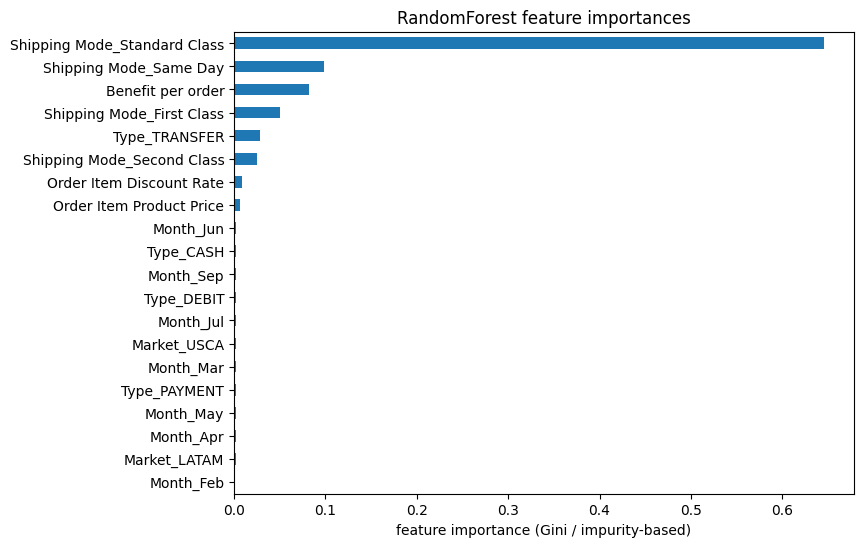

In [76]:
# feature names (D from your notebook is the Index of feature columns)
feature_names = list(D)

# scikit-learn RF/ensemble attribute
importances = boost_late.feature_importances_

# tidy dataframe and sort
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print(feat_imp.head(30))

# optional: plot top 20
import matplotlib.pyplot as plt
feat_imp.head(20).plot(kind='barh', figsize=(8,6))
plt.gca().invert_yaxis()
plt.xlabel('feature importance (Gini / impurity-based)')
plt.title('RandomForest feature importances')
plt.show()

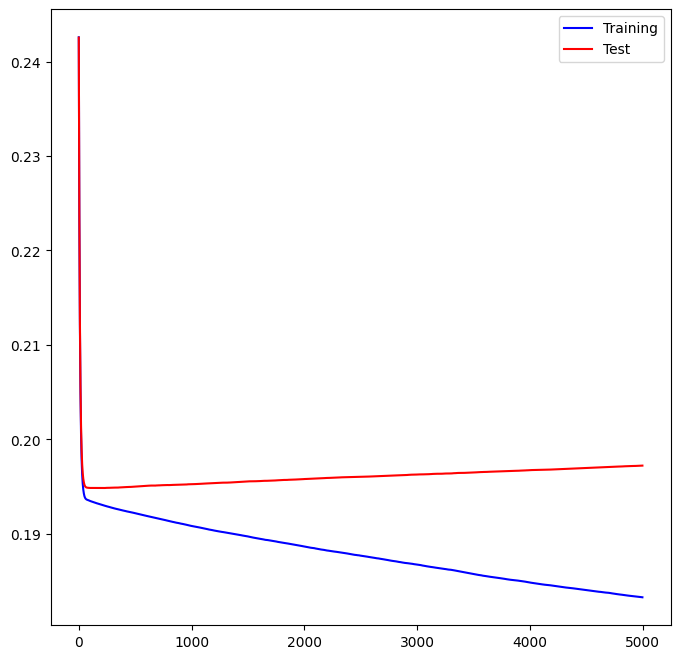

In [77]:
test_error = np.zeros_like(boost_late.train_score_) # Initialize array to store test errors
for idx, y_ in enumerate(boost_late.staged_predict(X_test)):
   test_error[idx] = np.mean((y_test - y_)**2) # Compute test MSE at each boosting iteration

plot_idx = np.arange(boost_late.train_score_.shape[0]) # Indices for plotting
ax = subplots(figsize=(8,8))[1] 
ax.plot(plot_idx,
        boost_late.train_score_,
        'b',
        label='Training') # Plot training error
ax.plot(plot_idx,
        test_error,
        'r',
        label='Test')
ax.legend(); # Plot test error
